In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Funcion para graficar las funciones de pertencia
'''
def graficador(nombre, tipo, rango, funciones):
    '''
    Esta funcion permite graficar cuantas funciones de pertenencia
    sean necesarias evaluandolas en un rango

    Parameters
    ----------
    tipo : int
        define el tipo de grafica que se realizara
        1 : DISTANCIA
        2 : ORIENTACION
        3 : LINEAL
        4 : ANGULAR

    rango : array[inf, sup]
        Es el rango que se mapeara toda la funcion desde inf hasta sup

    funciones : array[lambdas]
        Es un arreglo de funciones en en las que se evaluara todo
        el rango generado
    '''

    plt.figure(nombre,figsize=(6,5))
    x = np.linspace(rango[0],rango[1])
    y = []
    for i in range(len(funciones)):
        y.append([])

    for i in x:
        for j in range(len(funciones)):
            if(tipo == 1 or tipo == 3):
                if(callable(funciones[j])):
                    y[j].append(funciones[j](i,0))
                else:
                    y[j].append(funciones[j])
            elif(tipo == 2 or tipo == 4):
                temp = funciones[j]
                if(callable((funciones[j]))):
                    y[j].append(funciones[j](0,i))
                else:
                    y[j].append(funciones[j])
    for i in y:
        plt.plot(x,i)
    plt.title(nombre)
    plt.show()

In [3]:
'''
Generadores
    sirven para crear la respuesta de las funciones de pertenencia
'''
#Generador limite inferior
def fun_liminf(limp, lims, x):
    '''
    funcion que devuelve el valor de un punto evaluado
    en una funcion por partes

    Parameters
    ----------
    limp : float
        valor que sirve para definir el valor minimo de la funcion

    lims : float
        valor que sirve para definir el valor maximo de la funcion

    x : float
        valor que se desea evaluar en la funcion

    Returns
    -------
    float
        devuelve el valor que corresponde a evaluar x en la funcion
    '''

    m = 1 / (lims - limp)
    if(x < limp):
        return 1

    if(x >= lims):
        return 0

    else:
        return -m * (x - limp) + 1


#Generador limite base
def fun_base(limi, lims, x):
    '''
    funcion que devuelve el valor de un punto evaluado
    en una funcion por partes

    Parameters
    ----------
    limi : float
        valor que sirve para definir el valor inferior de la funcion

    lims : float
        valor que sirve para definir el valor superior de la funcion

    x : float
        valor que se desea evaluar en la funcion

    Returns
    -------
    float
        devuelve el valor que corresponde a evaluar x en la funcion
    '''

    limm = (lims - limi) / 2 + limi
    m = 1 / (lims - limm)
    if(x > limi and x <= limm):
        y = m * (x - limi)
    elif(x > limm and x <= lims):
        y = -m * (x - lims)
    else:
        y = 0
    return y

#Generador limite medio
def fun_media(limi, limmi, limms, lims, x):
    '''
    funcion que devuelve el valor de un punto evaluado
    en una funcion por partes

    Parameters
    ----------
    limi : float
        valor que sirve para definir el valor inferior de la funcion

    limmi : float
        valor que sirve para definir el valor inferior medio de la
        funcion

    limms : float
        valor que sirve para definir el valor superior medio de la
        funcion

    lims : float
        valor que sirve par adefinir el valor superior de la funcion

    x : float
        valor que se desea evaluar en la funcion

    Returns
    -------
    float
        devuelve el valor que corresponde a evaluar x en la funcion
    '''

    m = 1 / (limmi - limi)
    if(x >= limi and x < limmi):
        y = m * (x - limi)
    elif(x >= limmi and x < limms):
        y = 1
    elif(x >= limms and x < lims):
        y = -m * (x - lims)
    else:
        y = 0
    return y


#Generador limite superior
def fun_limsup(limi, limp, x):
    '''
    funcion que devuelve el valor de un punto evaluado
    en una funcion por partes

    Parameters
    ----------
    limi : float
        valor que sirve para definir el valor inferior de la funcion

    limp : float
        valor que sirve para definir el valor superior de la funcion

    x : float
        valor que se desea evaluar en la funcion

    Returns
    -------
    float
        devuelve el valor que corresponde a evaluar x en la funcion
    '''

    m = 1 / (limp - limi)
    if(x < limi):
        y = 0
    elif(x >= limp):
        y = 1
    else:
        y = m * (x - limi)
    return y


In [4]:
'''
Funciones de pertenencia INPUTS
'''
#DISTANCIA
muy_cerca = lambda distancia, orientacion: fun_liminf(0.2, 0.4, distancia)
cerca = lambda distancia, orientacion: fun_base(0.2, 0.6, distancia)
lejos = lambda distancia, orientacion: fun_base(0.4, 0.8, distancia)
muy_lejos = lambda distancia, orientacion: fun_limsup(0.6, 0.8, distancia)

#ORIENTACION
muy_izq = lambda distancia, orientacion: fun_liminf(40, 60, orientacion)
izq = lambda distancia, orientacion: fun_base(40,85, orientacion)
centro = lambda distancia, orientacion: fun_media(60, 85, 95, 120, orientacion)
der = lambda distancia, orientacion: fun_base(95, 140, orientacion)
muy_der = lambda distancia, orientacion: fun_limsup(120, 140, orientacion)


In [5]:
'''
Funciones de pertenencia OUTPUTS
'''
#VELOCIDAD LINEAL
super_lento = lambda vl, va: fun_base(0, 0.2, vl)
muy_lento = lambda vl, va: fun_base(0.1, 0.4, vl)
lento = lambda vl, va: fun_base(0.2, 0.6, vl)
rapido = lambda vl, va: fun_base(0.4, 0.8, vl)
muy_rapido = lambda vl, va: fun_base(0.6, 0.9, vl)
super_rapido = lambda vl, va: fun_limsup(0.8, 0.9, vl)

#VELOCIDAD ANGULAR
rapida_pos = lambda vl, va: fun_liminf(-0.75, -0.5, va)
rapida_neg = lambda vl, va: fun_base(-0.75, 0, va)
cero = lambda vl, va: fun_base(-0.5, 0.5, va)
lenta_pos = lambda vl, va: fun_base(0, 0.75, va)
lenta_neg = lambda vl, va: fun_limsup(0.5, 0.75, va)


In [6]:
'''
Operadores de ZADEH

AND
    *largs
OR
    *largs
'''

def AND(*largs):
    '''
    Parameters
    ----------
    largs : funciones
        funciones de pertenencias

    Returns
    -------
    funcion que devuelve el valor minimo en un arreglo
    '''
    def anon(*args, **kwargs):

        minimos = []
        for larg in largs:
            minimos.append(larg(*args, **kwargs))
        return min(minimos)
    return anon

def OR(*largs):
    '''
    Parameters
    ----------
    largs : funciones
        funciones de pertenencias

    Returns
    -------
    funcion que devuelve el valor maximo en un arreglo
    '''
    def anon(*args, **kwargs):
        maximos = []
        for larg in largs:
            if(callable(larg)):
                maximos.append(larg(*args, **kwargs))
            else:
                maximos.append(larg)
        return max(maximos)
    return anon


In [7]:
'''
Clausulas de HORN LINEALES
    (lejos,centro) = sRapida
    (lejos,no_centro) = muyRapida
    (lejos) = rapida
    (cerca) = lenta
    (muyCerca, no_centro) = superLenta
    (muyCerca, centro) = muy_lenta
'''
hipo1 = lambda distancia, orientacion: OR(muy_lejos(distancia,orientacion),centro(distancia,orientacion))
hipo2 = lambda distancia, orientacion: OR(muy_lejos(distancia,orientacion))
hipo3 = lambda distancia, orientacion: OR(lejos(distancia,orientacion))
hipo4 = lambda distancia, orientacion: OR(cerca(distancia,orientacion))
hipo5 = lambda distancia, orientacion: OR(muy_cerca(distancia,orientacion))
hipo6 = lambda distancia, orientacion: OR(muy_cerca(distancia,orientacion), centro(distancia,orientacion))

clau1 = lambda distancia, orientacion: AND(hipo1(distancia, orientacion), super_rapido)
clau2 = lambda distancia, orientacion: AND(hipo2(distancia, orientacion), muy_rapido)
clau3 = lambda distancia, orientacion: AND(hipo3(distancia, orientacion) , rapido)
clau4 = lambda distancia, orientacion: AND(hipo4(distancia, orientacion) , lento)
clau5 = lambda distancia, orientacion: AND(hipo5(distancia, orientacion) , super_lento)
clau6 = lambda distancia, orientacion: AND(hipo6(distancia, orientacion) , muy_lento)

In [8]:
'''
Clausulas de HORN ANGULARES
    (g_muyIzquierda) = rapidaPositiva
    (g_izquierda) = lentaPositiva
    (centro) = 0
    (g_derecha) = lentaNegativa
    (g_muyDerecha) = rapidaNegativa
'''
#Clausulas angulares
hipo7 = lambda distancia, orientacion: OR(muy_izq(distancia,orientacion))
hipo8 = lambda distancia, orientacion: OR(izq(distancia,orientacion))
hipo9 = lambda distancia, orientacion: OR(centro(distancia,orientacion))
hipo10 = lambda distancia, orientacion: OR(der(distancia,orientacion))
hipo11 = lambda distancia, orientacion: OR(muy_der(distancia,orientacion))

clau7 = lambda distancia, orientacion: AND(hipo7(distancia, orientacion), rapida_pos)
clau8 = lambda distancia, orientacion: AND(hipo8(distancia, orientacion) , lenta_pos)
clau9 = lambda distancia, orientacion: AND(hipo9(distancia, orientacion) , cero)
clau10 = lambda distancia, orientacion: AND(hipo10(distancia, orientacion) , lenta_neg)
clau11 = lambda distancia, orientacion: AND(hipo11(distancia, orientacion) , rapida_neg)

In [9]:
'''
Funciones de salida
F1
    Parameters
    ----------
    distancia : float
        la distancia a la que se encuentra el robot
    orientacion : float
        la orientacion en la que se encuentra el robot
    Returns
    -------
    valor de velocidad lineal normalizada
F2 = velocidad angular
    Parameters
    ----------
    distancia : float
        la distancia a la que se encuentra el robot
    orientacion : float
        la orientacion en la que se encuentra el robot
    Returns
    -------
    valor de velocidad angular
'''
f_out1 = lambda distancia, orientacion: OR(clau1(distancia,orientacion), clau2(distancia,orientacion), clau3(distancia,orientacion), clau4(distancia,orientacion), clau5(distancia,orientacion), clau6(distancia,orientacion))
f_out2 = lambda distancia, orientacion: OR(clau7(distancia,orientacion), clau8(distancia,orientacion), clau9(distancia,orientacion), clau10(distancia,orientacion), clau11(distancia,orientacion))

In [39]:
'''
Integrador
'''
def Centroide(tipo, fun, limi, lims, dx=0.01):
    '''
    Funcion que calcula el centroide de una funcion

    Parameters
    ----------
    tipo : int
        identifica si es una funcion de posicion o de orientacion
        1 : posicion
        2 : orientacion

    fun : funcion
        Es una funcion de la que se quiere encontrar el centroide

    limi : float
        Parametro que define el limite inferior desde donde se desea
        integrar

    lims : float
        Parametro que define el limite superior hasta donde se desea
        integrar

    dx : float
        Parametro que define el paso que se desea utilizar para
        calcular la integral

    Returns
    -------
    float
        es el valor del centroide de la integral
    '''
    samples = round((lims - limi)/dx)
    x = np.linspace(limi,lims,samples)
    #print("x: ",x)
    z = []
    zx = []
    if(tipo == 1):
        print("tipo 1 ----")
        for i in x:
            z.append(fun(i,0))
            zx.append(fun(i,0)*i)
        #z = fun(x,0)
        #zx = fun(x,0)*x
    else:
        print("tipo 2 -----")
        for i in x:
            z.append(fun(0,i))
            zx.append(fun(0,i)*i)
        #z = fun(0,x)
        #zx = fun(0,x)*x
    #plt.plot(x,z)
    #plt.show()
    iz = np.trapz(z,x)
    izx = np.trapz(zx,x)
    #print("iz: ", iz)
    #print("izx: ", izx)
    return izx/iz

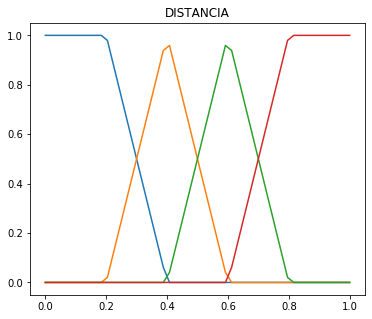

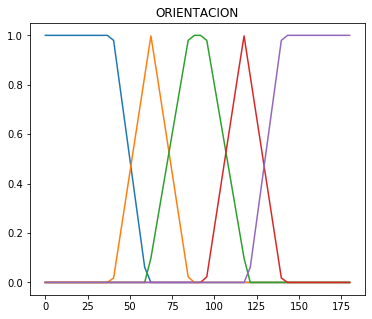

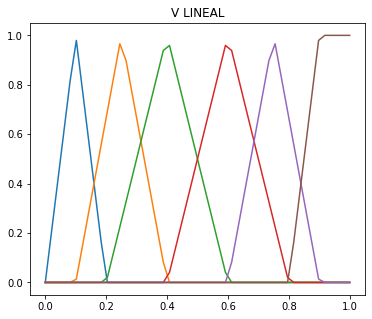

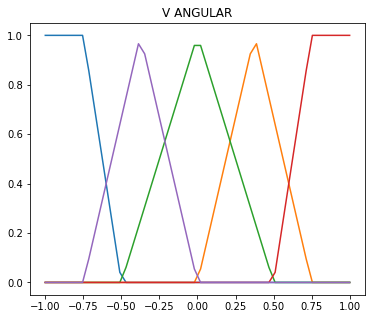

tipo 1 ----
El centroide de vLineal es:  0.8353793598829126
El valor de vLineal es:  0.4308042674472497
tipo 2 -----
El centroide de vAngular es:  -0.3749813892590985
El valor de vAngular es:  0.999950371357596


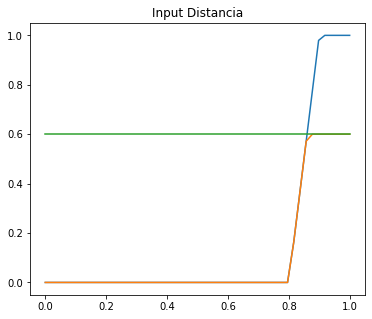

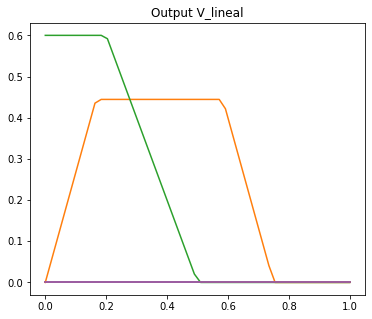

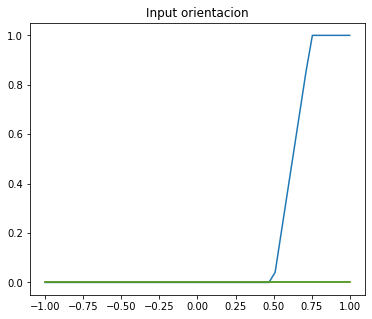

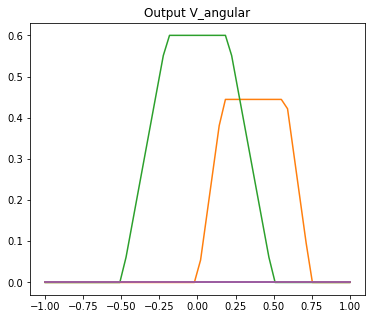

In [78]:
tests = 0 #bloque de tests
graficas = 1 #bloque para graficas de pertenencia
graficaT = 1 #bloque para graficas combinadas
graficaC = 1 #bloque para graficas cortadas

ang = 180
dist = 1

if(tests):
    #tests
    print(fun_liminf(0.2,0.4, 0.6))
if(graficas):
    #graficas input
    graficador("DISTANCIA", 1, [0,1],[muy_cerca, cerca, lejos, muy_lejos])
    graficador("ORIENTACION", 2, [0, 180], [muy_izq, izq, centro, der, muy_der])

    #graficas output
    graficador("V LINEAL", 3, [0, 1], [super_lento, muy_lento, lento, rapido, muy_rapido, super_rapido])
    graficador("V ANGULAR", 4, [-1, 1], [rapida_pos, lenta_pos, cero, lenta_neg, rapida_neg] )
if(graficaT):
    #f_out1
    #graficador("GRAFICAS COMBINADAS VLINEAL", 1,[0,1],[f_out1(0.6,75)])
    cL = Centroide(1, f_out1(dist,ang),0,1)
    print("El centroide de vLineal es: ", cL)
    print("El valor de vLineal es: ", f_out1(dist,ang)(cL,0))

    #f_out2
    #graficador("GRAFICAS COMBINADAS VANGULAR ",2,[-1,1],[f_out2(dist,ang)])
    cA = Centroide(2, f_out2(dist,ang),-1,1)
    print("El centroide de vAngular es: ", cA)
    print("El valor de vAngular es: ", f_out2(dist,ang)(0,cA))
if(graficaC):
    graficador("Input Distancia", 1, [0,1],[super_rapido,clau1(0.6,75),hipo1(0.6,75)])
    graficador("Output V_lineal",2, [0,1],[clau7(0.6,75),clau8(0.6,75),clau9(0.6,75),clau10(0.6,75),clau11(0.6,75)])
    
    graficador("Input orientacion", 2, [-1,1],[lenta_neg,clau11(0.6,75),hipo11(0.6,75)])
    graficador("Output V_angular",2, [-1,1],[clau7(0.6,75),clau8(0.6,75),clau9(0.6,75),clau10(0.6,75),clau11(0.6,75)])
    